**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. ([2-1]부터 [2-10], [3-1]부터 [3-2] 까지 미션 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[주피터 노트북 파일 안내]</span>**
1. 탐색적 데이터 분석(solution).ipynb: 미션 수행 대상 아님. 제공된 solution을 참고하여 [2-1]부터의 미션 수행을 위한 탐색적 데이터 분석 진행</br>
2. 데이터 전처리.ipynb: [2-1]부터 [2-8] 까지 미션 수행 대상</br>
3. 모델링(머신러닝).ipynb: [3-1]부터 [3-2] 까지 미션 수행 대상. [4-1]~[4-4]는 선택 사항임</br>

#### **<span style="color:red">[데이터 설명]</span>**

* air_2021.csv : 2021년 미세먼지 데이터
* air_2022.csv : 2022년 미세먼지 데이터
* weather_2021.csv : 2021년 날씨 데이터
* weather_2022.csv : 2022년 날씨 데이터
* 학습 데이터: 2021년의 미세먼지 농도 데이터, 테스트 데이터: 2022년의 미세먼지 농도 데이터

# [Step 1] 탐색적 데이터 분석

#### **<span style="color:blue">[1-1] 필요한 라이브러리 설치</span>**

In [1]:
# 필요한 라이브러리 설치 및 임포트
%pip install pandas seaborn

import pandas as pd
import seaborn as sns
import matplotlib as plt

Note: you may need to restart the kernel to use updated packages.


---

#### **<span style="color:blue">[1-2] 미세먼지 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'utf-8'
* index_col = 0

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장
air_21 = pd.read_csv('데이터/air_2021.csv', encoding='utf-8', index_col=0)
air_22 = pd.read_csv('데이터/air_2022.csv', encoding='utf-8', index_col=0)


In [9]:
# air_21 데이터의 head 확인
air_21.head()


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [10]:
# air_21 데이터의 shape 확인
air_21.shape


(8760, 12)

In [11]:
# air_22 데이터의 head 확인
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [12]:
# air_22 데이터의 shape 확인
air_22.shape


(2160, 12)

---

#### **<span style="color:blue">[1-3] 날씨 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [36]:
#'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장
weather_21 = pd.read_csv('데이터/weather_2021.csv', encoding='cp949')
weather_22 = pd.read_csv('데이터/weather_2022.csv', encoding='cp949')


In [14]:
# 미세먼지 데이터와 같이 날씨 데이터의 head, shape 등을 확인
weather_21.head()


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [17]:
weather_21.shape

(8759, 38)

In [18]:
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


In [19]:
weather_22.shape

(2160, 38)

---

#### **<span style="color:blue">[1-4] 데이터 변수 확인</span>**

In [20]:
# 각 데이터프레임의 info 확인
air_21.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [21]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


In [22]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [23]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_22.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

In [31]:
weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [32]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [37]:
# 모든 열 보기
pd.set_option('display.max_columns', 500)

In [39]:
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,NaN,41,NaN,1.3,-19.4,1021.9,NaN,1033.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,NaN,42,NaN,1.3,-19.7,1022.2,NaN,1033.6,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,NaN,43,NaN,1.3,-19.7,1022.3,NaN,1033.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,NaN,46,NaN,1.4,-18.8,1022.6,NaN,1034.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,NaN,48,NaN,1.4,-18.5,1021.9,NaN,1033.3,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


---

#### **<span style="color:blue">[1-5] 미세먼지 데이터 분석</span>**

* 데이터 전처리와 모델링을 위해 데이터 분석을 진행해보세요. 시각화 등을 통해 관측치들의 패턴 탐색, 잘못된 자료 탐색, 변수들간의 관계 파악을 할 수 있습니다.

In [40]:
# 시각화 한글폰트 설정 (아래 코드를 실행하세요)

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# air_21,air_22 의 다양한 변수에 대하여 시각화
# 시각화 함수
def visualization( data, var, bins = 20) :
  # 기초통계량
  display(data[[var]].describe())
  # 시각화
  plt.figure(figsize = (12, 8))
  # 히스토그램
  plt.subplot(2, 1, 1)
  sns.histplot(x = var, y = 'PM10', data = data, bins = bins, kde = True)
  # 박스플롯
  plt.subplot(2, 1, 2)
  sns.boxplot(x = var, y = 'PM10', data = data)
  
  plt.grid()
  plt.show()



,SO2
count,8648.000000
mean,0.003385
std,0.000826
min,0.001000
25%,0.003000
50%,0.003000
75%,0.004000
max,0.011000


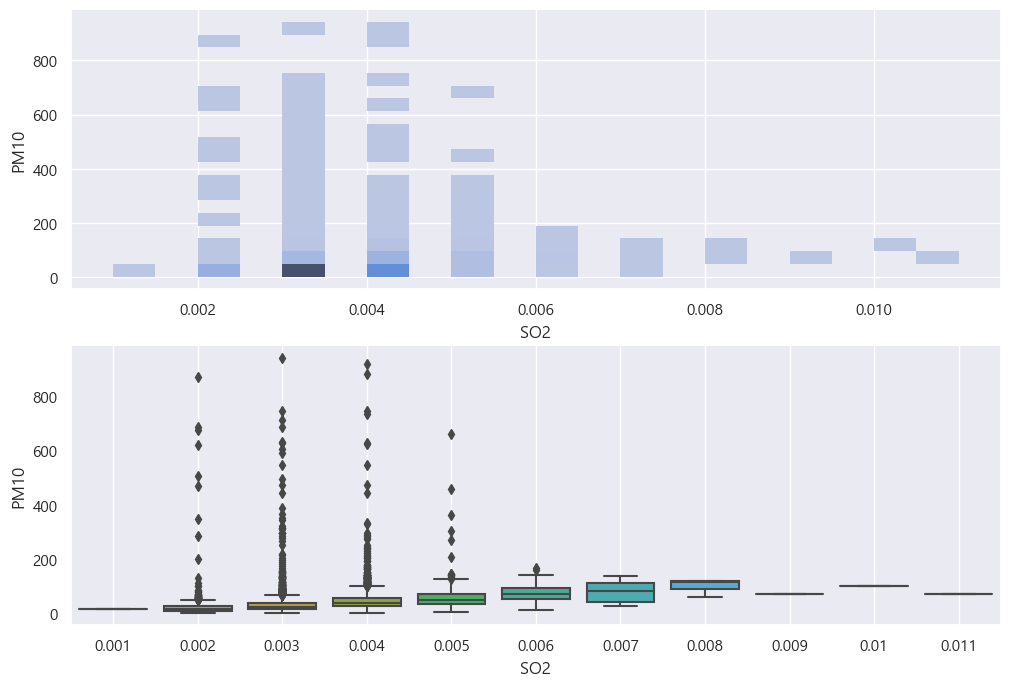

In [49]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
visualization(air_21, 'SO2')



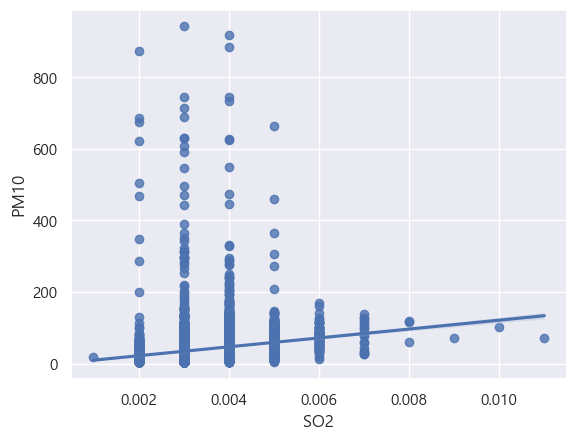

In [50]:
sns.regplot(x='SO2', y = 'PM10', data = air_21) # 직선식, 회귀식을 찾아줌 흐릿하게 보이는 게 회귀선에 대한 오차범위
plt.show()

In [ ]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.

---

#### **<span style="color:blue">[1-6] 날씨 데이터 분석</span>**

In [ ]:
# weather_21,weather_22 의 다양한 변수에 대하여 시각화





In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.





In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.





In [ ]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.